# Let's start from first principles and understand every step of our reservoir

Starting weight is 5, needs to learn to output 21 from an input of 3

In [1]:
%matplotlib inline
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib
import torch.nn as nn
from matplotlib.pyplot import figure

class OneWeightNet:
    def __init__(self):
        self.w = torch.tensor(5.,requires_grad=True)
        self.x = torch.tensor(3.)
        self.th = nn.Tanh()

    def forward(self):
        out = self.w*self.x
       

        self.v = out
        return out

In [15]:
m = OneWeightNet()

lr = 0.001
steps = 500

outs = []
for step in range(steps):
    y = m.forward()
    outs.append(y)
    target = torch.tensor(100.4)
    diff = y-target
    rms = diff.pow(2)
    rms.backward()
    
    w = m.w
    g = m.w.grad
    
    m.w = (w - torch.tensor(lr)*g)
    
    
print('Target: {}'.format(target))
print('Output: {}'.format(y))

fig,ax = plt.subplots()
plt.plot(outs)
plt.axhline(target,color='r')
plt.ylabel('Steps')
plt.xlabel('Value')
ax.figure.set_size_inches(14,5)

plt.legend({'Model','Target'})

TypeError: mul(): argument 'other' (position 1) must be Tensor, not NoneType

# New Learning Rate

Target: 100.4000015258789
Output: 100.40003967285156


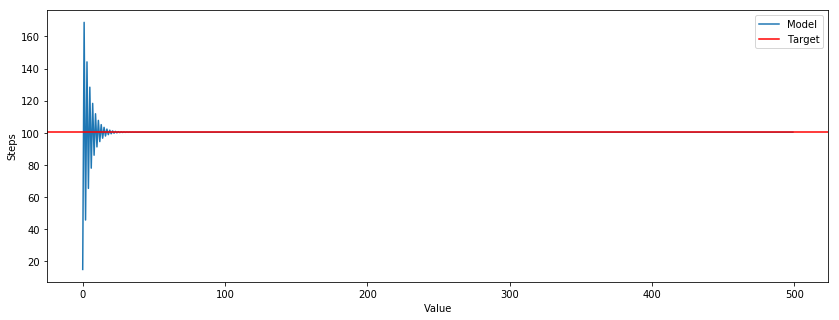

In [5]:
m = OneWeightNet()

lr = 0.1
steps = 500

outs = []
for step in range(steps):
    y = m.forward()
    outs.append(y)
    target = torch.tensor(100.4)
    diff = y-target
    rms = diff.pow(2)
    rms.backward()
    
    w = m.w.detach()
    g = m.w.grad.detach()
    
    m.w = (w - lr*g).clone().detach().requires_grad_(True)
    m.w.grad = None
    
    
print('Target: {}'.format(target))
print('Output: {}'.format(y))


fig,ax = plt.subplots()
plt.plot(outs)
plt.axhline(target,color='r')
plt.ylabel('Steps')
plt.xlabel('Value')
ax.figure.set_size_inches(14,5)

plt.legend({'Model','Target'})



# New Learning Rate

Target: 100.4000015258789
Output: 100.39997863769531


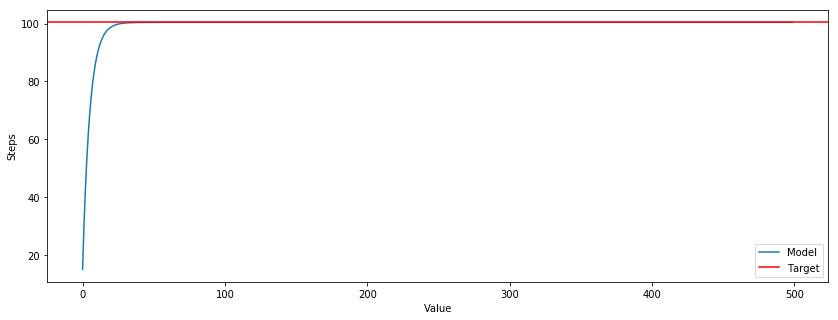

In [6]:
m = OneWeightNet()

lr = .01
steps = 500

outs = []
for step in range(steps):
    y = m.forward()
    outs.append(y)
    target = torch.tensor(100.4)
    diff = y-target
    rms = diff.pow(2)
    rms.backward()
    
    w = m.w.detach()
    g = m.w.grad.detach()
    
    m.w = (w - lr*g).clone().detach().requires_grad_(True)
    m.w.grad = None
    
    
print('Target: {}'.format(target))
print('Output: {}'.format(y))


fig,ax = plt.subplots()
plt.plot(outs)
plt.axhline(target,color='r')
plt.ylabel('Steps')
plt.xlabel('Value')
ax.figure.set_size_inches(14,5)

plt.legend({'Model','Target'})



# New Target

Target: 1258.498046875
Output: 1258.34423828125


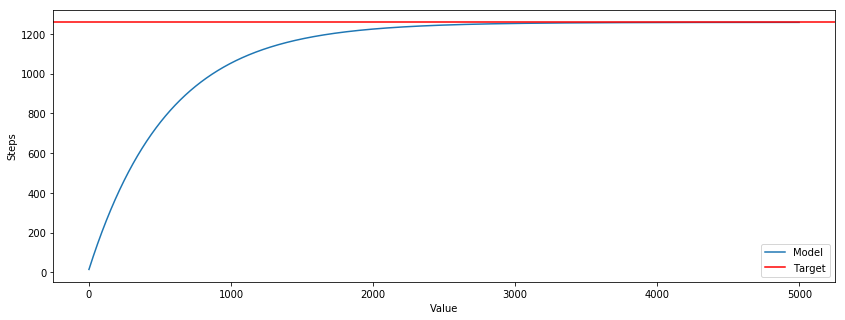

In [7]:
m = OneWeightNet()

lr = 0.0001
steps = 5000
target = torch.tensor(1258.4980)

outs = []
for step in range(steps):
    y = m.forward()
    outs.append(y)
    
    diff = y-target
    rms = diff.pow(2)
    rms.backward()
    
    w = m.w.detach()
    g = m.w.grad.detach()
    
    m.w = (w - lr*g).clone().detach().requires_grad_(True)
    m.w.grad = None
    
    
print('Target: {}'.format(target))
print('Output: {}'.format(y))


fig,ax = plt.subplots()
plt.plot(outs)
plt.axhline(target,color='r')
plt.ylabel('Steps')
plt.xlabel('Value')
ax.figure.set_size_inches(14,5)

plt.legend({'Model','Target'})



# Adding variables

In [8]:
class OneWeigtTwoInputNet:
    def __init__(self):
        self.w = torch.tensor(5.,requires_grad=True)
        self.x = torch.tensor(3.)
        self.x2 = torch.tensor(7.)
        self.th = nn.Tanh()

    def forward(self):
        out = self.w*self.x
        out2 = self.w*self.x2
       

        self.v = out
        self.v2 = out2
        return out,out2

Start with non-orthogonal output targets

Target: tensor([21., 49.])
Output: 20.977527618408203 and 48.947566986083984


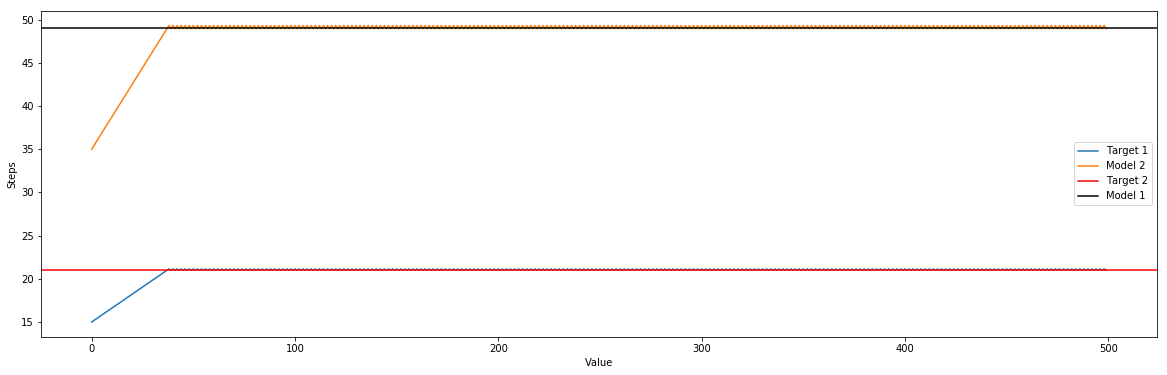

In [18]:
m = OneWeigtTwoInputNet()
lr = 0.01
steps = 500
target = torch.tensor([21.,49.]) # BOTH PRODUCTS OF SAME WEIGHT i.e. divisible by seven

outs = []
for step in range(steps):
    y1,y2 = m.forward()
    outs.append([y1,y2])
    
    diff1 = y1-target[0]
    diff2 = y2-target[1]
    rms = diff1.pow(2) + diff2.pow(2)
    rms = rms / torch.tensor(2.)
    rms = rms.pow(0.5)
    
    rms.backward()
    
    w = m.w.detach()
    g = m.w.grad.detach()
    
    m.w = (w - lr*g).clone().detach().requires_grad_(True)
    m.w.grad = None
    
    
print('Target: {}'.format(target))
print('Output: {} and {}'.format(y1,y2))

fig,ax = plt.subplots()
outs = np.asarray(outs)
plt.plot(outs[:,0])
plt.plot(outs[:,1])
plt.axhline(target[0],color='r')
plt.axhline(target[1],color='k')
plt.ylabel('Steps')
plt.xlabel('Value')
ax.figure.set_size_inches(20,6)


plt.legend({'Model 1','Model 2','Target 1','Target 2'})





Now targets that are dont share divisor

Target: tensor([ 21., 177.])
Output: 67.34447479248047 and 157.13711547851562


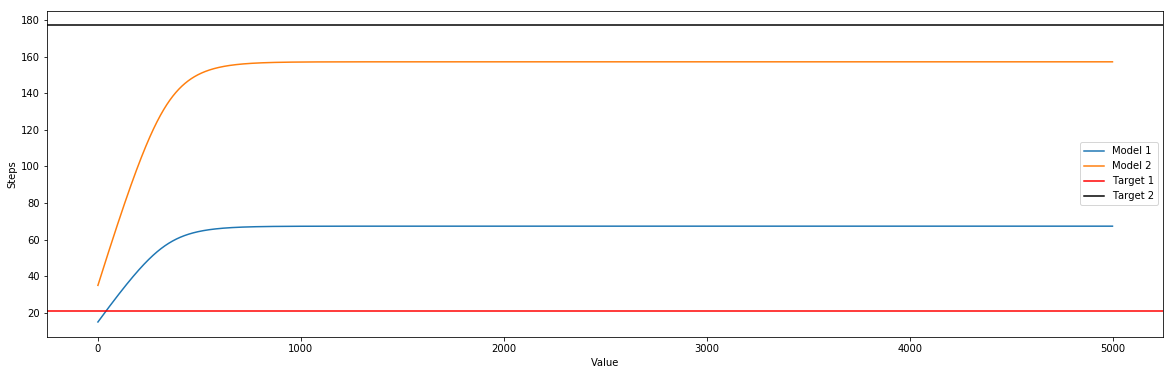

In [34]:
m = OneWeigtTwoInputNet()
lr = 0.01
steps = 5000
target = torch.tensor([21.,177.])

outs = []
for step in range(steps):
    y1,y2 = m.forward()
    outs.append([y1,y2])
    
    diff1 = y1-target[0]
    diff2 = y2-target[1]
    rms = diff1.pow(2) + diff2.pow(2)
    rms = rms / torch.tensor(2.)
    rms = rms.pow(0.5)
    
    rms.backward()
    
    w = m.w.detach()
    g = m.w.grad.detach()
    
    m.w = (w - lr*g).clone().detach().requires_grad_(True)
    m.w.grad = None
    
    
print('Target: {}'.format(target))
print('Output: {} and {}'.format(y1,y2))

fig,ax = plt.subplots()
outs = np.asarray(outs)
plt.plot(outs[:,0], label='Model 1')
plt.plot(outs[:,1], label='Model 2')
plt.axhline(target[0],color='r',label='Target 1')
plt.axhline(target[1],color='k', label='Target 2')
plt.ylabel('Steps')
plt.xlabel('Value')
ax.figure.set_size_inches(20,6)

ax.legend()

The function diverges due to insufficient weight space. Let's try *ADDING* some mothafuckin weights

In [50]:
class TwoWeightNet:
    def __init__(self):
        self.w = torch.tensor([5.,6.],requires_grad=True)
        self.x = torch.tensor([3.,7.])
        
        self.th = nn.Tanh()

    def forward(self):
        out = self.x * self.w

        return out

Target: tensor([ 21., 177.])
Output: tensor([ 21.0618, 177.0000], grad_fn=<MulBackward0>)


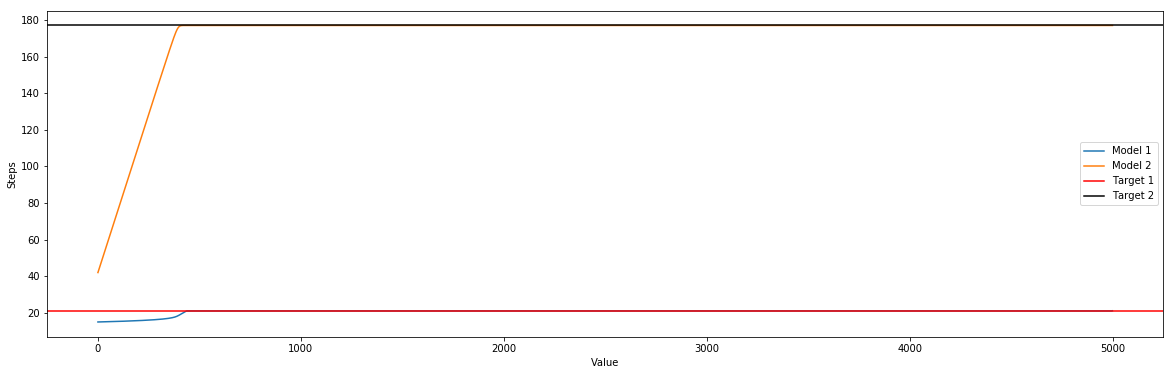

In [51]:
m = TwoWeightNet()
lr = 0.01
steps = 5000
target = torch.tensor([21.,177.])

outs = []
for step in range(steps):
    y = m.forward()
    outs.append(y.detach().numpy())
    
    diff1 = y[0]-target[0]
    diff2 = y[1]-target[1]
    rms = diff1.pow(2) + diff2.pow(2)
    rms = rms / torch.tensor(2.)
    rms = rms.pow(0.5)
    
    rms.backward()
    
    w = m.w.detach()
    g = m.w.grad.detach()
    
    m.w = (w - lr*g).clone().detach().requires_grad_(True)
    m.w.grad = None
    
    
print('Target: {}'.format(target))
print('Output: {}'.format(y))

fig,ax = plt.subplots()
outs = np.asarray(outs)
plt.plot(outs[:,0],label='Model 1')
plt.plot(outs[:,1],label='Model 2')
plt.axhline(target[0],color='r',label='Target 1')
plt.axhline(target[1],color='k',label='Target 2')
plt.ylabel('Steps')
plt.xlabel('Value')
ax.figure.set_size_inches(20,6)

ax.legend()

## OK so now we can get convergence, but this is not fully connected, let's take a look

In [52]:
class FC_TwoWeightNet:
    def __init__(self):
        self.w = torch.randn([2,2],requires_grad=True)
        self.x = torch.tensor([3.,7.])
        
        self.th = nn.Tanh()

    def forward(self):
        out = self.x * self.w

        return out

In [53]:
m = FC_TwoWeightNet()
print(m.w)
print(m.x)
m.forward()
print(m.forward())


tensor([[3.5654, 0.8525],
        [0.5162, 1.2380]], requires_grad=True)
tensor([3., 7.])
tensor([[10.6961,  5.9676],
        [ 1.5487,  8.6660]], grad_fn=<MulBackward0>)


# NOT what we want

In [54]:
class FC_TwoWeightNet:
    def __init__(self):
        self.w = torch.randn([2,2],requires_grad=True)
        self.x = torch.tensor([3.,7.])
        
        self.th = nn.Tanh()

    def forward(self):
        out = torch.matmul(self.w,self.x)

        return out

In [55]:
m = FC_TwoWeightNet()
print(m.w)
print(m.x)
m.forward()
print(m.forward())


tensor([[1.5495, 1.6047],
        [1.0358, 1.0235]], requires_grad=True)
tensor([3., 7.])
tensor([15.8812, 10.2719], grad_fn=<MvBackward>)


In [56]:
print(0.6*3 + -.5*7)
print(-1.1*3+-1.1*7)

-1.7000000000000002
-11.000000000000002


# We see that the top row corresponds to 

Target: tensor([ 21., 177.])
Output: tensor([ 21.0201, 177.1210], grad_fn=<MvBackward>)


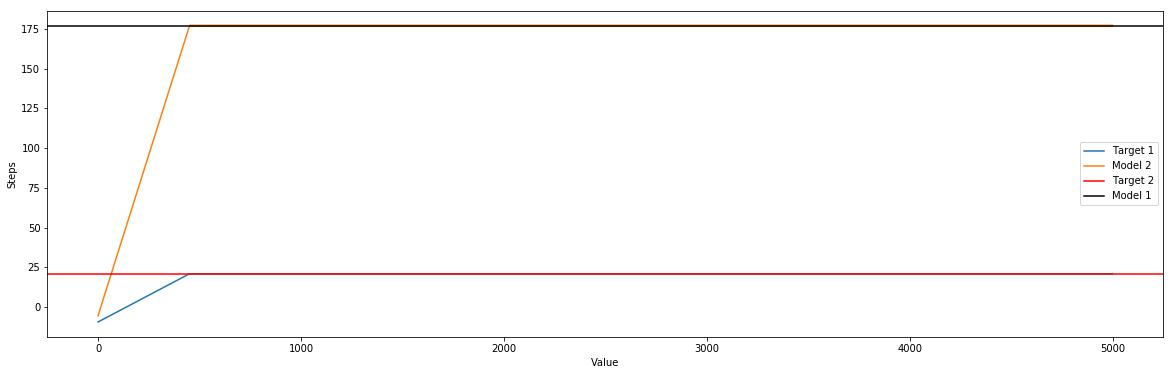

In [63]:
m = FC_TwoWeightNet()
lr = 0.01
steps = 5000
target = torch.tensor([21.,177.])

outs = []
for step in range(steps):
    y = m.forward()
    outs.append(y.detach().numpy())
    
    diff1 = y[0]-target[0]
    diff2 = y[1]-target[1]
    rms = diff1.pow(2) + diff2.pow(2)
    rms = rms / torch.tensor(2.)
    rms = rms.pow(0.5)
    
    rms.backward()
    
    w = m.w.detach()
    g = m.w.grad.detach()
    
    m.w = (w - lr*g).clone().detach().requires_grad_(True)
    m.w.grad = None
    
    
print('Target: {}'.format(target))
print('Output: {}'.format(y))

fig,ax = plt.subplots()
outs = np.asarray(outs)
plt.plot(outs[:,0])
plt.plot(outs[:,1])
plt.axhline(target[0],color='r')
plt.axhline(target[1],color='k')
plt.ylabel('Steps')
plt.xlabel('Value')
ax.figure.set_size_inches(20,6)


plt.legend({'Model 1','Model 2','Target 1','Target 2'})

Also able to converge

Now, lets look at the weights

In [64]:
m.w

tensor([[ 2.2311,  2.0371],
        [ 8.7565, 21.4924]], requires_grad=True)

In [ ]:
The inputs are 3 and 7, so it looks like what the model learned was to basically 

In [61]:
3*0.3 + 7*2.8

20.499999999999996

In [57]:
7.9+

SyntaxError: invalid syntax (<ipython-input-57-f130ab7c50eb>, line 1)